In [13]:
import zipfile
# import tensorflow as tf
import os
# import  imageio
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
# from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
# from pyESN.pyESN import ESN

In [14]:
mat3 = scipy.io.loadmat('case3_extended_8000.mat')
mat_multi = scipy.io.loadmat('case3_multiplexing.mat')

T = mat_multi['T']
n111 = mat_multi['n1']
n111_selected = mat_multi['n1_selected']
select_points = mat_multi['select_points']



ns3_extended = mat3['ns']
nn_classic = mat3['n_a']
g2_case3_extended = abs(mat3['g2_a'])
Delta_extended = mat3['Delta1_vector'][0]

In [15]:

n_case3_extended_Delta = []
g2_re_extended = []
n_classic = []

for i in range(8000):
    n_case3_extended_Delta.append(ns3_extended[0][i][0])
    g2_re_extended.append({g2_case3_extended[i][0]:Delta_extended[i]})
    n_classic.append(nn_classic[i][0])

def multiplexing(n_case3_extended_Delta, num_multi):
# num_multi = 5
    n_case3_extended_Delta_multiplexing = [] 
    for i in range(len(n_case3_extended_Delta)):

        n_case3_extended_Delta_multiplexing.append(n_case3_extended_Delta[i][10-num_multi:10])
        

    X_train_c3_ex, X_test_c3_ex, Y_train_c3_ex, Y_test_c3_ex = train_test_split(n_case3_extended_Delta_multiplexing,g2_re_extended, test_size=0.05)
    
    
    Y_train_g2 = []
    Y_train_r = []
    
    Y_test_g2 = []
    Y_test_r = []
    
    
    for ele in Y_train_c3_ex:
      key = list(ele.keys())
      value = list(ele.values())
      Y_train_g2.append(key)
      Y_train_r.append(value[0])
    Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))
    
    for ele in Y_test_c3_ex:
      key = list(ele.keys())
      value = list(ele.values())
      Y_test_g2.append(key[0])
      Y_test_r.append(value[0])
    Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))
    
    # regressor = RandomForestRegressor(n_estimators=100)
    regressor = ExtraTreesRegressor()
    regressor.fit(X_train_c3_ex, Y_train_g2)
    Y_predict_RFR = regressor.predict(X_test_c3_ex)
    # plt.scatter(Y_test_r, Y_test_g2,label = 'Ground Truth')
    # plt.scatter(Y_test_r, Y_predict_RFR,marker="+",s=25,label = 'Reservoir')
    # [mean_squared_error(Y_test_g2, Y_predict_RFR)]
    Nomin = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) - Y_predict_RFR))
    denom = sum(np.square(np.reshape(Y_test_g2,[len(Y_predict_RFR),]) + Y_predict_RFR))
    # (np.reshape(Y_test_g2,[400,])-np.shape(Y_predict_RFR))
    return n_case3_extended_Delta_multiplexing, Y_test_r, Y_test_g2, Y_predict_RFR, Nomin/denom



In [16]:
Y_predict_ = []
MSE_list = [] 
Y_test_r_multi = []
for i in list(range(1, 10 + 1)):
    nnn, Y_test_r, Y_test_g2, Y_predict_RFR, MSE = multiplexing(n_case3_extended_Delta,i)
    Y_predict_.append(Y_predict_RFR)
    Y_test_r_multi.append(Y_test_r)
    MSE_list.append(MSE)
    # plt.plot(Y_test_r, Y_test_g2)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

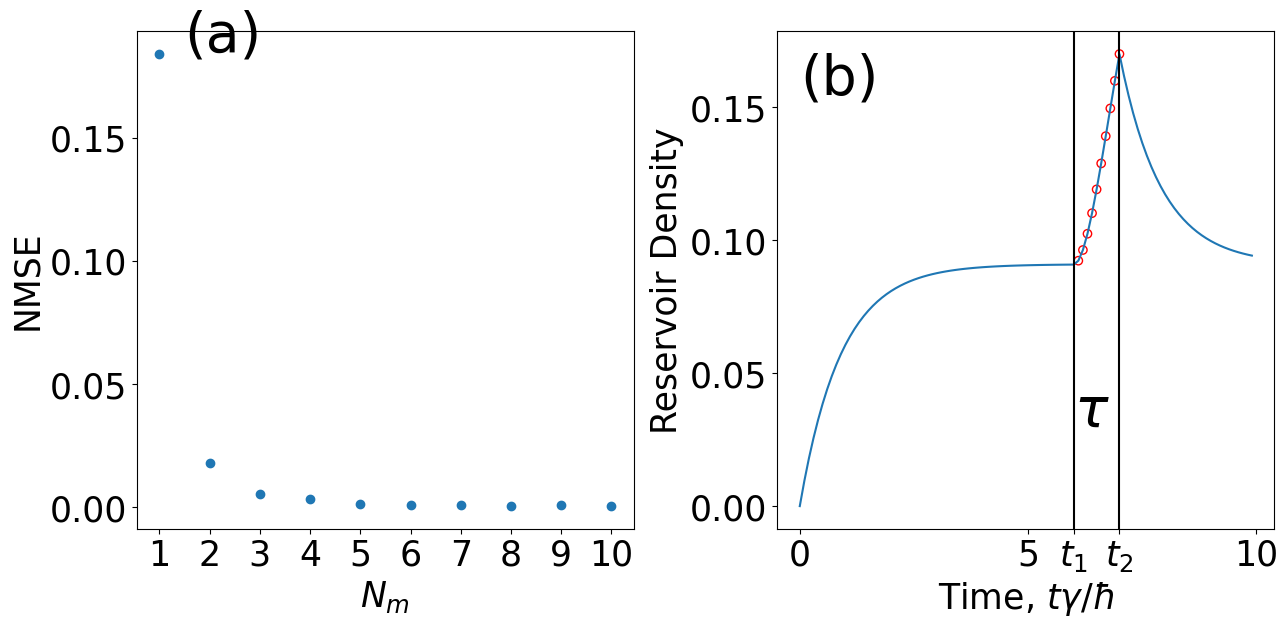

In [17]:
fig, axs = plt.subplots(1,2, figsize=(13, 13))

font_size = 25
# axs[0].tick_params(axis ='y', labelcolor = 'cornflowerblue',labelsize=25)
axs[0].tick_params(axis ='x',labelsize=font_size)
# axs[0].plot(Delta_extended, g2_case3_extended, color='cornflowerblue',linewidth=5)
# axs[0].set_yticks([1,2,3,4])
# axs[0].set_xticks([-10,-5,0,5,10])
axs[0].set_xlabel('$N_m$',fontsize=font_size)
axs[0].set_ylabel('NMSE',fontsize=font_size)
axs[0].scatter(list(range(1, 10 + 1)), MSE_list)
# t = axs[0].twinx()
axs[0].tick_params(axis ='y',labelsize=font_size)
# t.plot(Delta_extended, nn_classic, color='tomato',linewidth=5)
# t.set_yticks([0.1,0.3,0.5,0.7])
# t.set_ylabel('$<a^{\dagger}a>$',fontsize=font_size, color='tomato')
axs[0].set_box_aspect(1)
axs[0].set_xticks([1,2,3,4,5,6,7,8,9,10])
axs[0].text(1.5,0.185,'(a)',fontsize=40)
axs[1].set_ylabel('Reservoir Density',fontsize=font_size)
axs[1].set_xlabel(r'Time, $t\gamma/\hbar$',fontsize=font_size)
# axs[1].plot(Y_test_r, Y_test_g2,label = 'Ground Truth')
# axs[1].plot(Delta_extended, g2_case3_extended, label='Ground Truth',linewidth=2)
# axs[1].scatter(Y_test_r, Y_predict_RFR,marker="o",s=25,label = 'Reservoir',color='orange')
# axs[1].scatter(Y_test_r_c, Y_predict_RFR_classic,marker="s",s=25,label = 'No reservoir', alpha=0.5, color='green')
axs[1].tick_params(labelsize=font_size)
axs[1].plot(T[0], n111[0])
axs[1].scatter(select_points[0][0:10],n111_selected[0][0:10],facecolors='none', edgecolors='r')
# axs[1].annotate(s='', xy=(7,0.05), xytext=(6,0.05), arrowprops=dict(arrowstyle='<->'),fontsize=30)
axs[1].text(6.0,0.03,r'$\tau$',fontsize=40)
axs[1].axvline(6, color = 'k')
axs[1].axvline(7, color = 'k')
# axs[1].text(5,0,r'$t_1$',fontsize=font_size)
# axs[1].set_xticks([-10,-5,0,5,10])
axs[1].set_box_aspect(1)
axs[1].set_xticks([0, 5, 6, 7, 10])
axs[1].set_xticklabels([0, 5, r'$t_1$', r'$t_2$', '10'])
axs[1].text(0,0.155,'(b)',fontsize=40)
# axs[1].yaxis.set_label_position("right")
# axs[1].yaxis.tick_right()
# axs[1].legend(fontsize=18,markerscale=2,handletextpad=0.5, loc=1)
plt.tight_layout()
plt.savefig("multi_points.pdf", format="pdf", bbox_inches="tight")